In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from data.instron_tests.instron_processing import *
import pint
import pint_pandas

ureg = pint_pandas.PintType.ureg
ureg.setup_matplotlib()
ureg.formatter.default_format = 'P~'
ureg.mpl_formatter = "{:~P}"

# Homogeneous Samples

Mean High Density Modulus: 26.163
Mean Low Density Modulus: 0.616
High-Low Density Modulus Ratio: 42.487


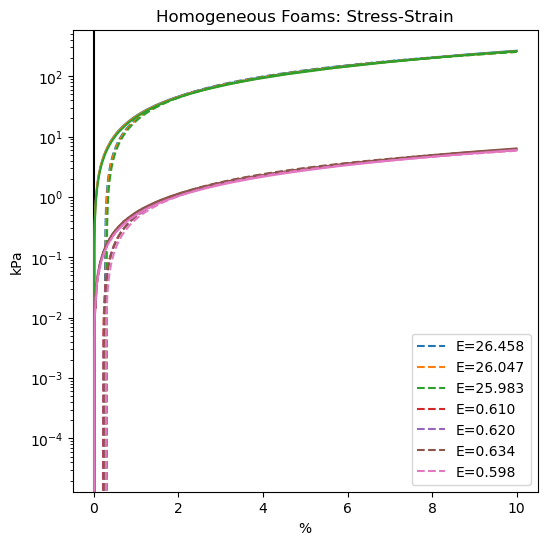

In [33]:
# Load Data
dir = './clean_data'
def fn(x): return True


dfs, metadata = load_samples(dir,
                             strain_threshold=0.02,
                             fit_strain_limits=(0., 0.1),
                             filter_fn=(lambda f: ('homogeneous' in f.stem)))

# Data to plot
x_col = 'Compressive strain (Displacement)'
y1_col = 'Compressive stress'
y2_col = 'Compressive stress (Line Fit)'
# x bounds of plot
xlim = (0, 0.1)

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.axvline(color='k')
ax.axhline(color='k')

for i, df in enumerate(dfs):
    mask = (df[x_col] >= xlim[0]) & (df[x_col] <= xlim[1])
    ax.plot(df[x_col][mask], df[y1_col][mask])
    ax.plot(df[x_col][mask], df[y2_col][mask],
            linestyle='dashed',
            color=ax.lines[-1].get_color(),
            label=f"E={metadata[i]['slope']:.3f}")

ax.legend()
ax.set(title='Homogeneous Foams: Stress-Strain',
       yscale='log',
       #   xlabel='Strain (%)',
       #   ylabel='Stress (kPa)'
       )

E_hi = np.mean([m['slope'] for m in metadata if m['slope'] > 1.])
E_lo = np.mean([m['slope'] for m in metadata if m['slope'] < 1.])
mod_ratio = E_hi / E_lo
print(f"Mean High Density Modulus: {E_hi:.3f}")
print(f"Mean Low Density Modulus: {E_lo:.3f}")
print(f"High-Low Density Modulus Ratio: {mod_ratio:.3f}")

# Foam Metamaterials

509_HSA-1_vertical
510_BULK-1_vertical
529_BULK-1_vertical
539_BULK-2_vertical
553_VERT-1_horizontal
553_VERT-1_vertical


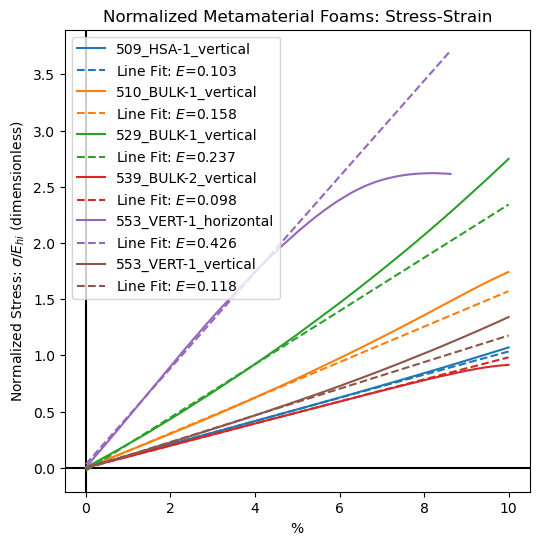

In [24]:
dir = './clean_data'
dfs, metadata = load_samples(dir,
                             fit_strain_limits=(0., 0.05),
                             filter_fn=lambda f: 'homogeneous' not in f.stem)

# Data to plot
x_col = 'Compressive strain (Displacement)'
y1_col = 'Compressive stress'
y2_col = 'Compressive stress (Line Fit)'
# x bounds of plot
xlim = (0, 0.1)

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.axvline(color='k')
ax.axhline(color='k')

# Plot stress-strain curves for metamaterial foams, with stress normalized by the high density average modulus to match the normalization in the simulator
for i, df in enumerate(dfs):
    mask = (df[x_col] >= xlim[0]) & (df[x_col] <= xlim[1])
    ax.plot(df[x_col][mask], df[y1_col][mask]/E_hi,
            label=metadata[i]['filename'])
    ax.plot(df[x_col][mask], df[y2_col][mask]/E_hi,
            linestyle='dashed',
            color=ax.lines[-1].get_color(),
            label=rf"Line Fit: $E$={metadata[i]['slope']/E_hi:.3f}")
    print(metadata[i]['filename'])

ax.set(title='Normalized Metamaterial Foams: Stress-Strain',
       ylabel=r'Normalized Stress: $\sigma / E_{hi}$ (dimensionless)')
ax.legend()